In [1]:
import matplotlib
import pandas as pd
import networkx as nx, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from networkx.algorithms import centrality



In [8]:
# original graph
import json
import networkx as nx

# Load the JSON data
with open('physician_network.json', 'r') as file:
    data = json.load(file)

G = nx.Graph()

# Add nodes with attributes
for node in data['nodes']:
    G.add_node(node['id'][0], **{k: v[0] for k, v in node.items() if k != 'id'})

# Add edges with attributes
for edge in data['edges']:
    G.add_edge(edge['source'][0], edge['target'][0], **{k: v[0] for k, v in edge.items() if k not in ['source', 'target']})

In [2]:
A=pd.read_csv("A_physician.csv",index_col=0)
X=pd.read_csv("X_physician.csv",index_col=0)#.set_index("name")
A=A.reset_index(drop=True).T.reset_index(drop=True)
X=X.reset_index(drop=True)

In [3]:
X.head()

,adoption.dateTRUE,med_sch_yrTRUE,meetingsTRUE,joursTRUE,free_timeTRUE,discussTRUE,clubsTRUE,friendsTRUE,communityTRUE,patientsTRUE,proximityTRUE,specialty2,specialty3,specialty4
0,0,0,1,1,1,0,0,0,1,1,1,0,1,0
1,1,1,0,1,0,1,0,1,0,1,1,0,0,0
2,0,1,0,1,0,0,0,1,1,1,0,1,0,0
3,0,1,0,1,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,1,1,0,0,1,0,0,0,0,0


In [4]:
# load into networkx from edgelist
G=nx.Graph()
edgelist=np.array(np.where(A>0)).T
# G.add_nodes_from(range(A.shape[0]))
G.add_edges_from(edgelist)

# add attributes to nodes, X is a dataframe with the attributes as columns
for col in X.columns:
    nx.set_node_attributes(G, pd.Series(X[col]).to_dict(), col)


In [5]:
# return Practice vertex attribute, assign to color

def generate_color_map(node_attributes):
    color_map = []
    n_colors = len(set(node_attributes.values()))
    palette = sns.color_palette("hls", n_colors)
    palette=dict(zip(set(node_attributes.values()), palette))
    for value in node_attributes.values():
        color_map.append(palette[value])
    return color_map




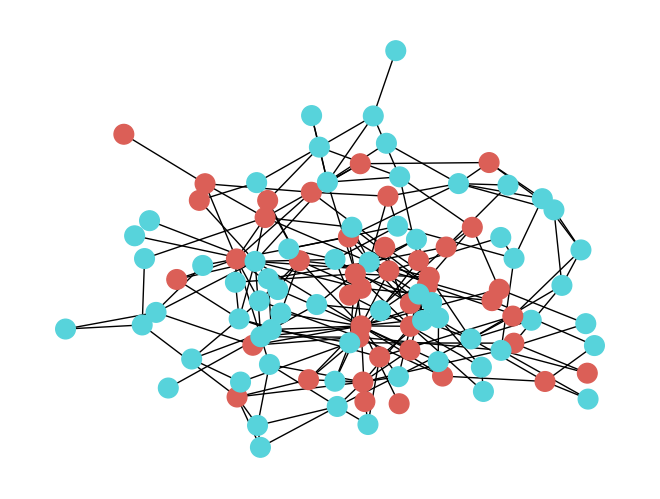

In [28]:
# plot network, color by practice
np.random.seed(42)
# fr layout
pos = nx.spring_layout(G,iterations=200)
color_map = generate_color_map(nx.get_node_attributes(G, 'adoption.dateTRUE'))
nx.draw(G, pos, node_size=200, node_color=color_map, font_size=10, with_labels=False)


# Clustering

In [11]:
# community detection with louivain and leiden
from cdlib.algorithms import leiden, louvain


Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [41]:
np.random.seed(42)
node_clustered=louvain(G, resolution=0.99)
node_clustered={k:v[0] for k,v in node_clustered.to_node_community_map().items()}
nx.set_node_attributes(G, node_clustered, "louvain")

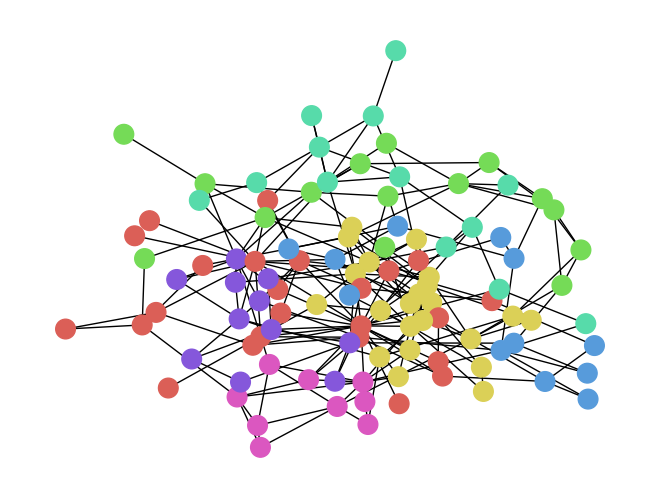

In [38]:
color_map = generate_color_map(nx.get_node_attributes(G, 'louvain'))
nx.draw(G, pos, node_size=200, node_color=color_map, font_size=10, with_labels=False)

In [39]:

clustering = SpectralClustering(n_clusters=5, assign_labels="discretize",
                                random_state=0, affinity="precomputed").fit(np.array(A))

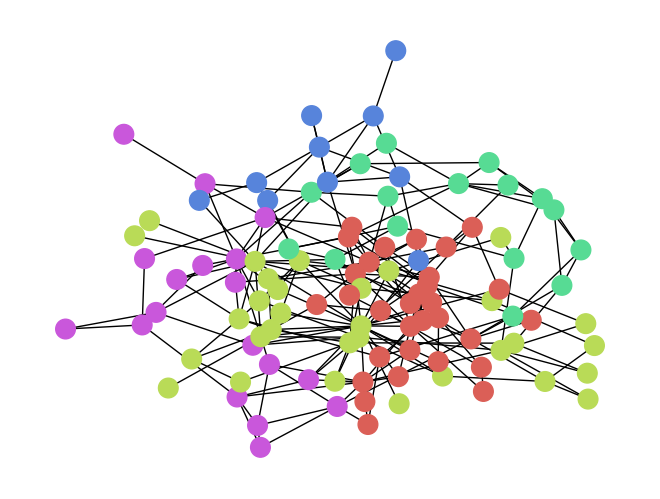

In [40]:
nx.set_node_attributes(G, dict(enumerate(clustering.labels_)), "spectral")
color_map = generate_color_map(nx.get_node_attributes(G, 'spectral'))
nx.draw(G, pos, node_size=200, node_color=color_map, font_size=10, with_labels=False)

# Influential Member Analysis

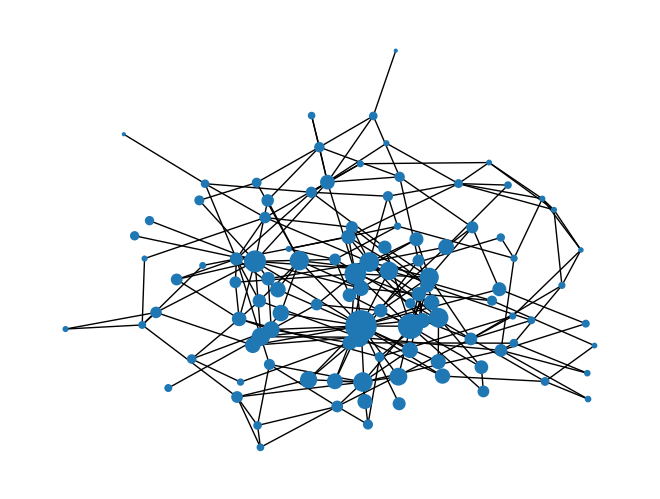

In [44]:
# identify centrality of each node
centrality=nx.eigenvector_centrality(G)
nx.set_node_attributes(G, centrality, "eigenvector")
# size nodes by centrality
node_size = [v * 1000 for v in nx.get_node_attributes(G, 'eigenvector').values()]
nx.draw(G, pos, node_size= node_size, font_size=10, with_labels=False)

# Network Lag Models

In [45]:
# https://pysal.org/spreg/notebooks/GM_Lag_example.html
import libpysal
from spreg import GM_Lag
from libpysal.weights import W


In [46]:
X

,adoption.dateTRUE,med_sch_yrTRUE,meetingsTRUE,joursTRUE,free_timeTRUE,discussTRUE,clubsTRUE,friendsTRUE,communityTRUE,patientsTRUE,proximityTRUE,specialty2,specialty3,specialty4
0,0,0,1,1,1,0,0,0,1,1,1,0,1,0
1,1,1,0,1,0,1,0,1,0,1,1,0,0,0
2,0,1,0,1,0,0,0,1,1,1,0,1,0,0
3,0,1,0,1,1,0,0,0,1,0,1,0,0,0
4,0,1,0,0,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,0,0,0,1,0,0,0,1,1,0,0,0,0
102,1,0,0,0,0,0,0,1,1,0,0,0,0,1
103,1,1,0,0,1,0,0,0,0,0,0,0,0,1
104,1,1,0,0,1,0,0,0,0,0,0,0,0,1


# Initial GCN Practice
Clustering and dimensionality reduction with graph neural networks

In [8]:
# pip install git+https://github.com/jlevy44/GCN4R --no-deps # I will share an updated list of packages
from gcn4r.api import train_model_


In [31]:
train_model_(sparse_matrix=A.values, feature_matrix=X.values, 
             task="classification", ae_type="VGAE", custom_dataset='none', save_model=True, learning_rate=1e-2, 
             K=2, lambda_cluster=5e-1, lambda_sparse=1e-2, lambda_l2=1e-2, lambda_recon=0.5, lambda_pred=3., lambda_kl=1e-3,
             kl_warmup=8, n_epochs=300, epoch_cluster=10, use_mincut=False, prediction_column=0, model_save_loc="model.pkl")

Random Seed: 42
Epoch 0 Time:0.007, Train Loss:11.264497756958008
Epoch 0 Val Loss:4.271303653717041
Epoch 1 Time:0.006, Train Loss:9.733531951904297
Epoch 1 Val Loss:4.299886703491211
Epoch 2 Time:0.014, Train Loss:8.031440734863281
Epoch 2 Val Loss:4.325039863586426
Epoch 3 Time:0.008, Train Loss:8.205207824707031
Epoch 3 Val Loss:4.514364242553711
Epoch 4 Time:0.006, Train Loss:6.820112228393555
Epoch 4 Val Loss:4.609267234802246
Epoch 5 Time:0.006, Train Loss:7.207220077514648
Epoch 5 Val Loss:4.687105178833008
Epoch 6 Time:0.005, Train Loss:6.47146463394165
Epoch 6 Val Loss:4.609143257141113
Epoch 7 Time:0.005, Train Loss:6.402669906616211
Epoch 7 Val Loss:4.5311808586120605
Epoch 8 Time:0.005, Train Loss:6.313007354736328
Epoch 8 Val Loss:4.496435165405273
Epoch 9 Time:0.005, Train Loss:6.1855926513671875
Epoch 9 Val Loss:4.511411666870117
56 50
Epoch 10 Time:0.006, Train Loss:13.104825019836426
Epoch 10 Val Loss:4.371944904327393
35 71
Epoch 11 Time:0.005, Train Loss:10.59180927

/Users/joshualevy/opt/anaconda3/envs/py311/lib/python3.11/site-packages/gcn4r/model_trainer.py:100: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



62 44
Epoch 14 Time:0.006, Train Loss:5.700254440307617
Epoch 14 Val Loss:4.621847629547119
28 78
Epoch 15 Time:0.005, Train Loss:5.111886978149414
Epoch 15 Val Loss:4.547751426696777
33 73
Epoch 16 Time:0.006, Train Loss:4.682031631469727
Epoch 16 Val Loss:4.5396623611450195
16 90
Epoch 17 Time:0.005, Train Loss:4.525018692016602
Epoch 17 Val Loss:4.625250339508057
38 68
Epoch 18 Time:0.005, Train Loss:4.544641494750977
Epoch 18 Val Loss:4.646639823913574
New Best Model at Epoch 18
36 70
Epoch 19 Time:0.005, Train Loss:4.4930219650268555
Epoch 19 Val Loss:4.582800388336182
New Best Model at Epoch 19
101 5
Epoch 20 Time:0.005, Train Loss:4.470053195953369
Epoch 20 Val Loss:4.483644008636475
New Best Model at Epoch 20
91 15
Epoch 21 Time:0.005, Train Loss:4.359572410583496
Epoch 21 Val Loss:4.421787261962891
New Best Model at Epoch 21
28 78
Epoch 22 Time:0.005, Train Loss:4.313952445983887
Epoch 22 Val Loss:4.389788627624512
New Best Model at Epoch 22
17 89
Epoch 23 Time:0.005, Train Lo

{'loss_log':      adv         kl     recon   cluster      pred  epoch  val_loss
 0    0.0   1.388460  2.258543  0.000000  0.670920      0  4.271304
 1    0.0   1.449130  2.283705  0.000000  0.672061      1  4.299887
 2    0.0   1.745784  2.290264  0.000000  0.678259      2  4.325040
 3    0.0   2.452538  2.470030  0.000000  0.681445      3  4.514364
 4    0.0   3.236009  2.555635  0.000000  0.684544      4  4.609267
 ..   ...        ...       ...       ...       ...    ...       ...
 295  0.0  93.778275  2.005092  0.166130  1.171205    295  5.601771
 296  0.0  93.785774  2.058997  0.166093  1.171708    296  5.657166
 297  0.0  93.790428  2.024980  0.166110  1.171890    297  5.623707
 298  0.0  93.793633  2.061553  0.166136  1.172069    298  5.660829
 299  0.0  93.795349  2.019006  0.166143  1.172349    299  5.619124
 
 [300 rows x 7 columns],
 'best_epoch': 211}

In [32]:
output=train_model_(sparse_matrix=A.values, feature_matrix=X.values, 
             task="classification", ae_type="VGAE", custom_dataset='none', save_model=True, learning_rate=1e-2, 
             K=2, lambda_cluster=3e-3, lambda_sparse=1e-2, lambda_l2=1e-2, prediction_column=0,
             kl_warmup=20, epoch_cluster=50, use_mincut=False, model_save_loc="model.pkl",predict=True, prediction_save_loc="prediction.pkl")

Random Seed: 42
Link Prediction Diagnostics:
              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66       242
         1.0       0.66      0.70      0.68       242

    accuracy                           0.67       484
   macro avg       0.67      0.67      0.67       484
weighted avg       0.67      0.67      0.67       484

     T    F
+  169   87
-   73  155
AUC=0.7323014138378526, threshold=0.5391031503677368
Classification Diagnostics:
train results:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        36
           1       0.90      0.81      0.85        54

    accuracy                           0.83        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.84      0.83      0.83        90

val results:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86  

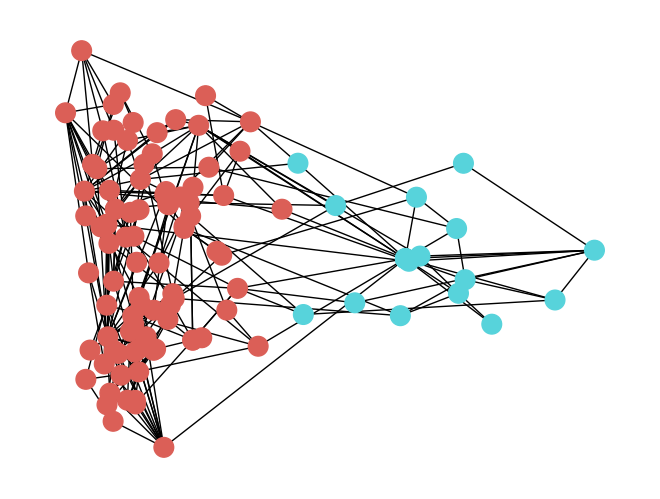

In [6]:
from sklearn.decomposition import PCA
import numpy as np, torch
np.random.seed(42)
output=torch.load("predictions.pkl")
pos = dict(enumerate(PCA(n_components=2).fit_transform(output["z"]).tolist()))
nx.set_node_attributes(G, dict(enumerate(output["cl"])), "gnn")
color_map = generate_color_map(nx.get_node_attributes(G, 'gnn'))
nx.draw(G, pos, node_size=200, node_color=color_map, font_size=10, with_labels=False)

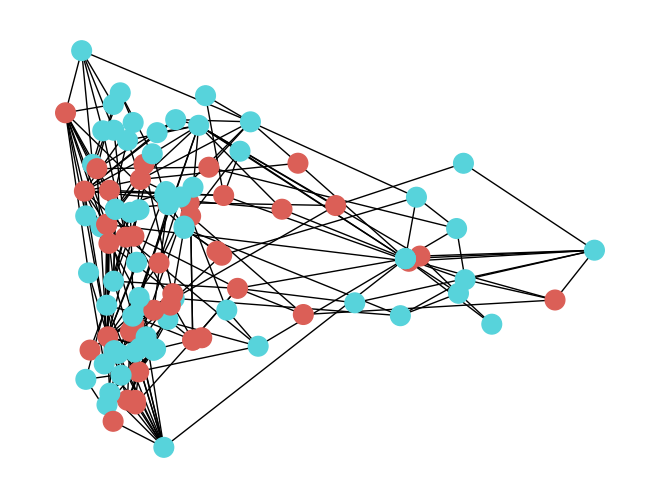

In [7]:
color_map = generate_color_map(nx.get_node_attributes(G, 'adoption.dateTRUE'))
nx.draw(G, pos, node_size=200, node_color=color_map, font_size=10, with_labels=False)